In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from collections import defaultdict
import re

In [104]:
df1 = pd.read_csv("naukriscrapdata.csv")

In [105]:
df1.drop(['Unnamed: 0'],inplace = True,axis = 1) 
df1.drop_duplicates(inplace=True) 
df1.dropna(subset=["skills"])

,roles,companies,locations,experience,skills,Dates,PresentDate,salary
0,Data Scientist / Data Analyst -Business Analyst,Inflexion Analytix Private Limited,"Mumbai, Hyderabad/Secunderabad, Pune, Gurgaon/...",0-3 Yrs,Business Intelligence\nArtificial Intelligence...,14 DAYS AGO,2021-05-24,"3,50,000 - 4,50,000 PA."
1,Senior Data Scientist,Fractal Analytics,"Mumbai, Gurgaon/Gurugram, Bangalore/Bengaluru",4-8 Yrs,Business Intelligence\nArtificial Intelligence...,14 DAYS AGO,2021-05-24,Not disclosed
2,Senior Data Scientist,Fractal Analytics,"Gurgaon/Gurugram, Bangalore/Bengaluru, Mumbai ...",5-10 Yrs,Business Intelligence\nArtificial Intelligence...,14 DAYS AGO,2021-05-24,Not disclosed
3,Senior Data Scientist,Decision Point,"Gurgaon/Gurugram, Chennai",3-6 Yrs,Data Science\nJava\nHive\nR\nSAS\nHadoop\nSpar...,4 DAYS AGO,2021-05-24,Not disclosed
4,Sr. Data Scientist - AutoML,TransOrg Analytics,Gurgaon/Gurugram,5-8 Yrs,Artificial Intelligence\nComputer Science\nBig...,5 DAYS AGO,2021-05-24,Not disclosed
...,...,...,...,...,...,...,...,...
1076,Data-Scientist,Datanomist,Hyderabad,3-6 Yrs,IT Skills\nJava\nPython\nTableau\nData Scienti...,30+ DAYS AGO,2021-05-24,Not disclosed
1077,Data Scientist,Tech Ringers,Hyderabad/Secunderabad,8-13 Yrs,BPO\nRF\nImage processing\nStaffing\nPharma\nA...,30+ DAYS AGO,2021-05-24,Not disclosed
1078,Data Scientist,VSigma IT Labs Pvt. Ltd.,Hyderabad,2-5 Yrs,Data Scientist,30+ DAYS AGO,2021-05-24,Not disclosed
1079,Data Scientist,Ancla Consultancy Services India Pvt Ltd,Hyderabad/Secunderabad,6-12 Yrs,Location: Hyderabad\nData Scientist\nExperienc...,30+ DAYS AGO,2021-05-24,Not disclosed


In [106]:
#data consists of job openings related to techsupport/BPO/Helpdesk and similar unwanted roles which are not required here
Search_for_These_values = ['Help Desk','Helpdesk','tech support','BPO','Testing'] 
pattern = '|'.join(Search_for_These_values)
filter = df1['skills'].str.contains(pattern,na=False)
result=df1[~filter]

In [107]:
#picking up location for EDA
result['locations'].value_counts()[:20]
uniq_locs = set()
for loc in result['locations']:
    uniq_locs = uniq_locs.union(set(loc.split(',')))
    
uniq_locs = set([item.strip() for item in uniq_locs])

locations_str = '|'.join(result['locations']) # All locations into a single string for pattern matchings 
loc_dict = defaultdict(int)
for loc in uniq_locs:
    loc_dict[loc] = len(re.findall(loc, locations_str))

In [108]:
# Take the most frequent job locations
jobs_by_loc = pd.Series(loc_dict).sort_values(ascending = False)
jobs_by_loc['Mumbai_MH'] = jobs_by_loc['Mumbai'] + jobs_by_loc['Navi Mumbai'] + jobs_by_loc['Nagpur'] + jobs_by_loc['Thane'] + jobs_by_loc['Mumbai (All Areas)']
jobs_by_loc['Bengaluru_KA'] = jobs_by_loc['Bengaluru'] + jobs_by_loc['Bangalore/Bengaluru'] + jobs_by_loc['Mysore/Mysuru'] + jobs_by_loc['Bangalore/Bengaluru(Seshadripuram)']
jobs_by_loc['Delhi NCR'] = jobs_by_loc['Delhi NCR'] + jobs_by_loc['Delhi'] + jobs_by_loc['Noida'] + jobs_by_loc['Gurgaon'] + jobs_by_loc['Gurgaon/Gurugram'] + jobs_by_loc['Delhi / NCR']
jobs_by_loc['Trivandrum_KL'] = jobs_by_loc['Trivandrum/Thiruvananthapuram'] + jobs_by_loc['Kochi/Cochin'] + jobs_by_loc['Kozhikode']
jobs_by_loc['Hyderabad_AP'] = jobs_by_loc['Hyderabad'] + jobs_by_loc['telangana'] + jobs_by_loc['Visakhapatnam'] + jobs_by_loc['Hyderabad/Secunderabad']
jobs_by_loc['Ahmedabad_GJ'] = jobs_by_loc['Vadodara'] + jobs_by_loc['Ahmedabad']
jobs_by_loc['Kolkata_WB'] = jobs_by_loc['Kolkata'] +jobs_by_loc['Kalyani'] +jobs_by_loc['Calicut/Kozhikode'] + jobs_by_loc['bhubaneswar']
jobs_by_loc['Chennai_TN'] = jobs_by_loc['Chennai'] + jobs_by_loc['Coimbatore'] 
jobs_by_loc['Pune_MH'] = jobs_by_loc['Pune']
jobs_by_loc['Chandigarh_CH'] = jobs_by_loc['Chandigarh'] +jobs_by_loc['Mohali'] +jobs_by_loc['Mohali/SAS Nagar']
jobs_by_loc.drop(['Nagar','Jaipur','Indore','haryana','Hosur','india','Jamshedpur','PAN India','Other','Rajkot','Work from Home','Dubai','Faridabad','Ghaziabad','Uttar Pradesh','Bhubaneshwar','Agra','Gondiya','Bharuch','Cochin/ Kochi/ Ernakulam','Kanpur','Bhubaneswar','Jhansi','Lucknow','REMOTE','mangalagiri','kerala','Bhopal','Canada','uttar pradesh','rajasthan','Guntur','Jaunpur','Chandigarh','Mohali','Mohali/SAS Nagar','bhubaneswar','Bangalore/Bengaluru(Wind Tunnel Road)','Noida(Sector-62 Noida)','Kolkata(New Town)','Pune(Baner)','Bangalore/Bengaluru(HSR Layout)','Pune(Kalyani Nagar)','Pune(Kothrud)','Mumbai (All Areas)(Vikhroli)','Chennai(Ramapuram)','Hyderabad/Secunderabad(Jubilee Hills)','Pune(Kharadi)','any','Calicut/Kozhikode','Nagpur','Kalyani','New Delhi','Pune','Noida','Gurgaon','Gurgaon/Gurugram','Coimbatore','Chennai','Kolkata','Ahmedabad','Vadodara','Visakhapatnam','telangana','Hyderabad/Secunderabad','Hyderabad','Trivandrum/Thiruvananthapuram','Kochi/Cochin','Kozhikode','Delhi / NCR','Bengaluru','Bangalore/Bengaluru','Mysore/Mysuru','Bangalore/Bengaluru(Seshadripuram)','Mumbai','Navi Mumbai','Nagpur','Mumbai (All Areas)','Thane','Delhi','India','Remote'], inplace=True)
jobs_by_loc['PANIndia'] = sum(jobs_by_loc)-(jobs_by_loc['Pune_MH'] + jobs_by_loc['Chennai_TN'] + jobs_by_loc['Kolkata_WB'] + jobs_by_loc['Ahmedabad_GJ'] + jobs_by_loc['Hyderabad_AP'] + jobs_by_loc['Trivandrum_KL'] + jobs_by_loc['Delhi NCR'] + jobs_by_loc['Bengaluru_KA'] + jobs_by_loc['Mumbai_MH'] )

jobs = pd.DataFrame (jobs_by_loc)
df5 = pd.DataFrame(data=jobs.index, columns=['Location'])

df6 = pd.DataFrame(data=jobs.values, columns=['jobcount'])
df7 = pd.merge(df5, df6, left_index=True, right_index=True)
print(df7)

         Location  jobcount
0       Delhi NCR       337
1       Mumbai_MH       137
2    Bengaluru_KA       696
3   Trivandrum_KL        13
4    Hyderabad_AP       227
5    Ahmedabad_GJ        11
6      Kolkata_WB        29
7      Chennai_TN        87
8         Pune_MH       111
9   Chandigarh_CH         9
10       PANIndia         9


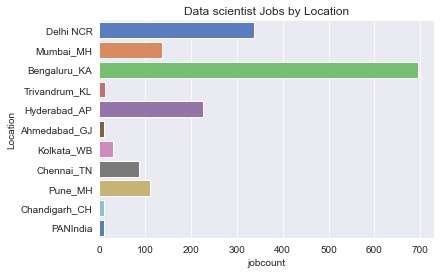

In [109]:
#plotting the locations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("darkgrid")

bar_plot = sns.barplot(y=df7.Location,x=df7.jobcount,
                        palette="muted",orient = 'h')                        
plt.title("Data scientist Jobs by Location")
plt.show()

In [110]:
##checking for roles
result['roles'].value_counts ()[:50]
roledf=pd.DataFrame(result.roles.apply(pd.Series).stack().value_counts()).reset_index()
roledf.columns=["roles","Openings"]
roledf.head()

,roles,Openings
0,Data Scientist,296
1,Senior Data Scientist,88
2,Lead Data Scientist,25
3,Principal Data Scientist,13
4,Associate Data Scientist,11


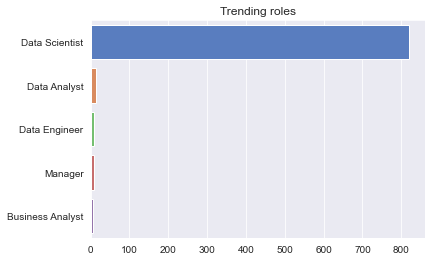

In [111]:
datascience={}
datascience['Data Scientist']=roledf["Openings"][roledf['roles'].str.contains('Data Scien', regex=True)].sum()
datascience['Data Analyst']=roledf["Openings"][roledf['roles'].str.contains('Data Analy', regex=True)].sum()
datascience['Business Analyst']=roledf["Openings"][roledf['roles'].str.contains('Business', regex=True)].sum()
datascience['Data Engineer']=roledf["Openings"][roledf['roles'].str.contains('Data Engineer', regex=True)].sum()
datascience['Manager']=roledf["Openings"][roledf['roles'].str.contains('Manager', regex=True)].sum()
from operator import itemgetter
datascience=dict(sorted(datascience.items(), key=itemgetter(1),reverse=True))
datascience
datascience = pd.Series(datascience)
bar_plot = sns.barplot(y=datascience.index,x=datascience.values,
                        palette="muted",orient = 'h')                                  
plt.title("Trending roles")
plt.show()

<ipython-input-112-b202a95ff238>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['experience'] = result['experience'].str.replace('Yrs','', regex=True)
<ipython-input-112-b202a95ff238>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['experience'] = result['experience'].str.replace('None','0-0', regex=True)


<AxesSubplot:>

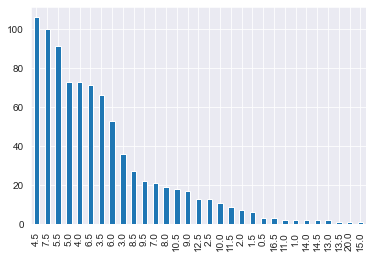

In [112]:
#Checking for experience
result['experience'] = result['experience'].str.replace('Yrs','', regex=True)
result['experience'] = result['experience'].str.replace('None','0-0', regex=True)

#Splitting range in two columns
result=result.join(result['experience'].str.split('-', 1, expand=True).rename(columns={0:'min_exp', 1:'max_exp'}))
result['min_exp'] =result['min_exp'].astype('float64')
result['max_exp'] =result['max_exp'].apply(pd.to_numeric)
col = result.loc[: , "min_exp":"max_exp"]
result['avg_exp']=col.mean(axis=1)

exp_counts = result['avg_exp'].value_counts()
exp_counts.plot.bar(x='index', y='avg_exp')


In [113]:
result['salary'] = result['salary'].str.replace('PA.','', regex=True)
result['salary'] = result['salary'].str.replace(',','', regex=True)
result['salary'] = result['salary'].str.replace('1 Cr and above ','10000000', regex=True)
result['salary'] = result['salary'].str.replace('more than ','', regex=True)